In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Seaborn for plotting and styling
import seaborn as sns

sns.set()
sns.set(rc={'figure.figsize':(10,8)})

In [2]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


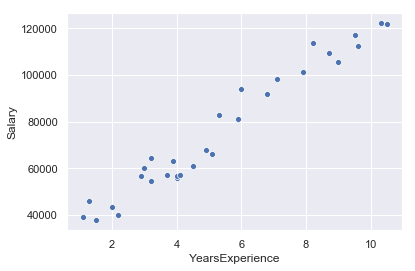

In [3]:
sns.scatterplot(data = dataset, x = 'YearsExperience', y = 'Salary');

###### No outliers here.
###### For simple linear regression, no need to go for feature scaling as sklearns library will take care of that for us.

In [4]:
dataset.shape

(30, 2)

In [5]:
# creating a df(matrix) of independent variables
X = dataset.iloc[:,0:-1]
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [6]:
# creating a df(matrix) of dependent variables
y = dataset.loc[:,'Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Fitting algorithm to our training set

In [9]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

fit => our regressor has learnt the correlations of the training sets variables and has learnt to predict salary based on experience.

In [10]:
# Predicting the Test set results
# y-pred will have vector of predictions for dependant variables
y_pred = regressor.predict(X_test)  

In [11]:
# comparing the results
df = pd.DataFrame({'YearsExperience':X_test.loc[:,'YearsExperience'],'y_test':y_test, 'y_pred':y_pred})
df

,YearsExperience,y_test,y_pred
2,1.5,37731.0,40835.105909
28,10.3,122391.0,123079.399408
13,4.1,57081.0,65134.556261
10,3.9,63218.0,63265.367772
26,9.5,116969.0,115602.645454
24,8.7,109431.0,108125.891499
27,9.6,112635.0,116537.239698
11,4.0,55794.0,64199.962017
17,5.3,83088.0,76349.687193
22,7.9,101302.0,100649.137545


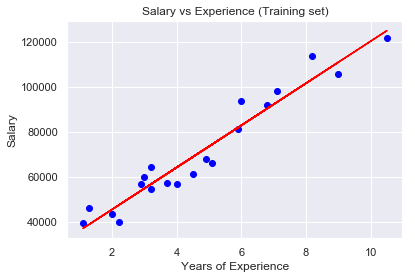

In [15]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

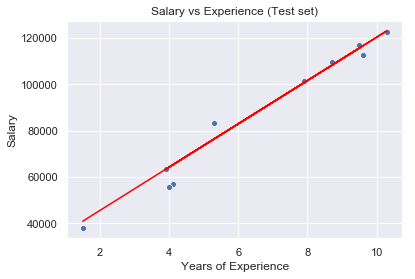

In [13]:
# Visualising the Test set results
sns.scatterplot(data = df, x = 'YearsExperience', y = 'y_test');
plt.plot(df['YearsExperience'], y_pred, color = 'red');
plt.title('Salary vs Experience (Test set)');
plt.xlabel('Years of Experience');
plt.ylabel('Salary');

__[Statistical significance](https://www.investopedia.com/terms/s/statistically_significant.asp)__ is the likelihood that a relationship between two 
or more variables is caused by something other than chance. Statistical 
hypothesis testing is used to determine whether the result of a data set is 
statistically significant. This test provides a p-value, representing the 
probability that random chance could explain the result. In general, a p-value
of 5% or lower is considered to be statistically significant.